In [2]:
import numpy as np
import os 
import json
import requests
import matplotlib.pyplot as plt 

In [26]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import cv2
import random 
def visualize_scatter_with_images(X_2d_data, images, figsize=(45,45), image_zoom=1):
    fig, ax = plt.subplots(figsize=figsize)
    artists = []
    for xy, i in zip(X_2d_data, images):
        x0, y0 = xy
        img = OffsetImage(i, zoom=image_zoom)
        ab = AnnotationBbox(img, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(X_2d_data)
    ax.autoscale()
    ax.axis("off")
    plt.show()


In [68]:
artworks = []
tags = {}
image_loc = './artworks/images'
predef_keys = ['style', 'genre', 'yearAsString']
extraction_keys = ['yearAsString', 'location', 'period', 'serie', 'genre', 'material', 'style', 'technique', 'auction', 'galleryName', 'tags',]
for filename in os.listdir('./artworks'):
    if filename.endswith('.json'):
        artist = json.load(open(os.path.join('./artworks', filename), 'r'))
        for artwork in artist:
            for key in extraction_keys:
                if (key in artwork) and (artwork[key] is not None) and (artwork[key] !=''):
                    extracted_tag = artwork[key]
                    if ',' in extracted_tag:
                        extracted_tag = extracted_tag.split(',')
                        for subtag in extracted_tag:
                            x  = subtag.strip()
                            if x not in tags:
                                tags[x] = len(tags) # id that shit
                    else:
                        if extracted_tag not in tags:
                            tags[extracted_tag] = len(tags)
#             if 'image' in artwork:
#                 url = artwork['image'].replace('!Large.jpg', '')
#                 print(f"Downlading {url}...")
#                 try:
#                     r = requests.get(url)
#                     savename = artwork['title'] + "_" + artwork['artistName'] +'.jpg'
#                     with open(os.path.join(image_loc, savename.strip()), 'wb') as f:
#                         f.write(r.content)
#                 except:
#                     print('\tFailed! Invalid schema')
#                     pass 

In [69]:
tags

{'2000': 0,
 'graffiti': 1,
 'Street art': 2,
 '2001': 3,
 '2002': 4,
 '2003': 5,
 'MelbourneAustralia': 6,
 '2004': 7,
 '2005': 8,
 'installation': 9,
 'Conceptual Art': 10,
 '2006': 11,
 'portrait': 12,
 '2007': 13,
 'figurative': 14,
 '2008': 15,
 'genre painting': 16,
 '1955': 17,
 'Neo-Dada': 18,
 '1956': 19,
 '1961': 20,
 'abstract': 21,
 'Abstract Expressionism': 22,
 '1963': 23,
 '1964': 24,
 '1976': 25,
 '1980': 26,
 '1984': 27,
 '1989': 28,
 '1992': 29,
 '1993': 30,
 '1999': 31,
 '1930': 32,
 'cityscape': 33,
 'Post-Impressionism': 34,
 '1947': 35,
 'interior': 36,
 '1948': 37,
 '1954': 38,
 'landscape': 39,
 'Impressionism': 40,
 'sketch and study': 41,
 'still life': 42,
 '1879': 43,
 '1882': 44,
 'self-portrait': 45,
 'Realism': 46,
 'flower painting': 47,
 '1946': 48,
 'Cubism': 49,
 '1959': 50,
 'Outsider art': 51,
 'Social Realism': 52,
 '1970': 53,
 'Pop Art': 54,
 '1971': 55,
 'religious painting': 56,
 'Neo-Expressionism': 57,
 '1973': 58,
 '1974': 59,
 '1975': 60,
 

In [30]:
images = []
org_images= []
files = os.listdir('./artworks/images')
chosen = random.sample(files, 500)
for filename in chosen:
    if filename.endswith('.jpg'):
        img = cv2.imread(os.path.join('./artworks/images', 
                                      filename), cv2.IMREAD_COLOR)
        img = cv2.resize(img, (45, 45))
        org_images.append(img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = img.flatten()
        images.append(img)
images = np.array(images)

In [31]:
images_scaled = StandardScaler().fit_transform(images)

/home/lemurpwned/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/lemurpwned/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [32]:
pca = PCA(n_components=200)
pca_res = pca.fit_transform(images_scaled)

In [33]:
tsne = TSNE(n_components=2, perplexity=35.0, n_iter=3000)
tsne_result = tsne.fit_transform(pca_res)
tsne_result_scaled = StandardScaler().fit_transform(tsne_result)

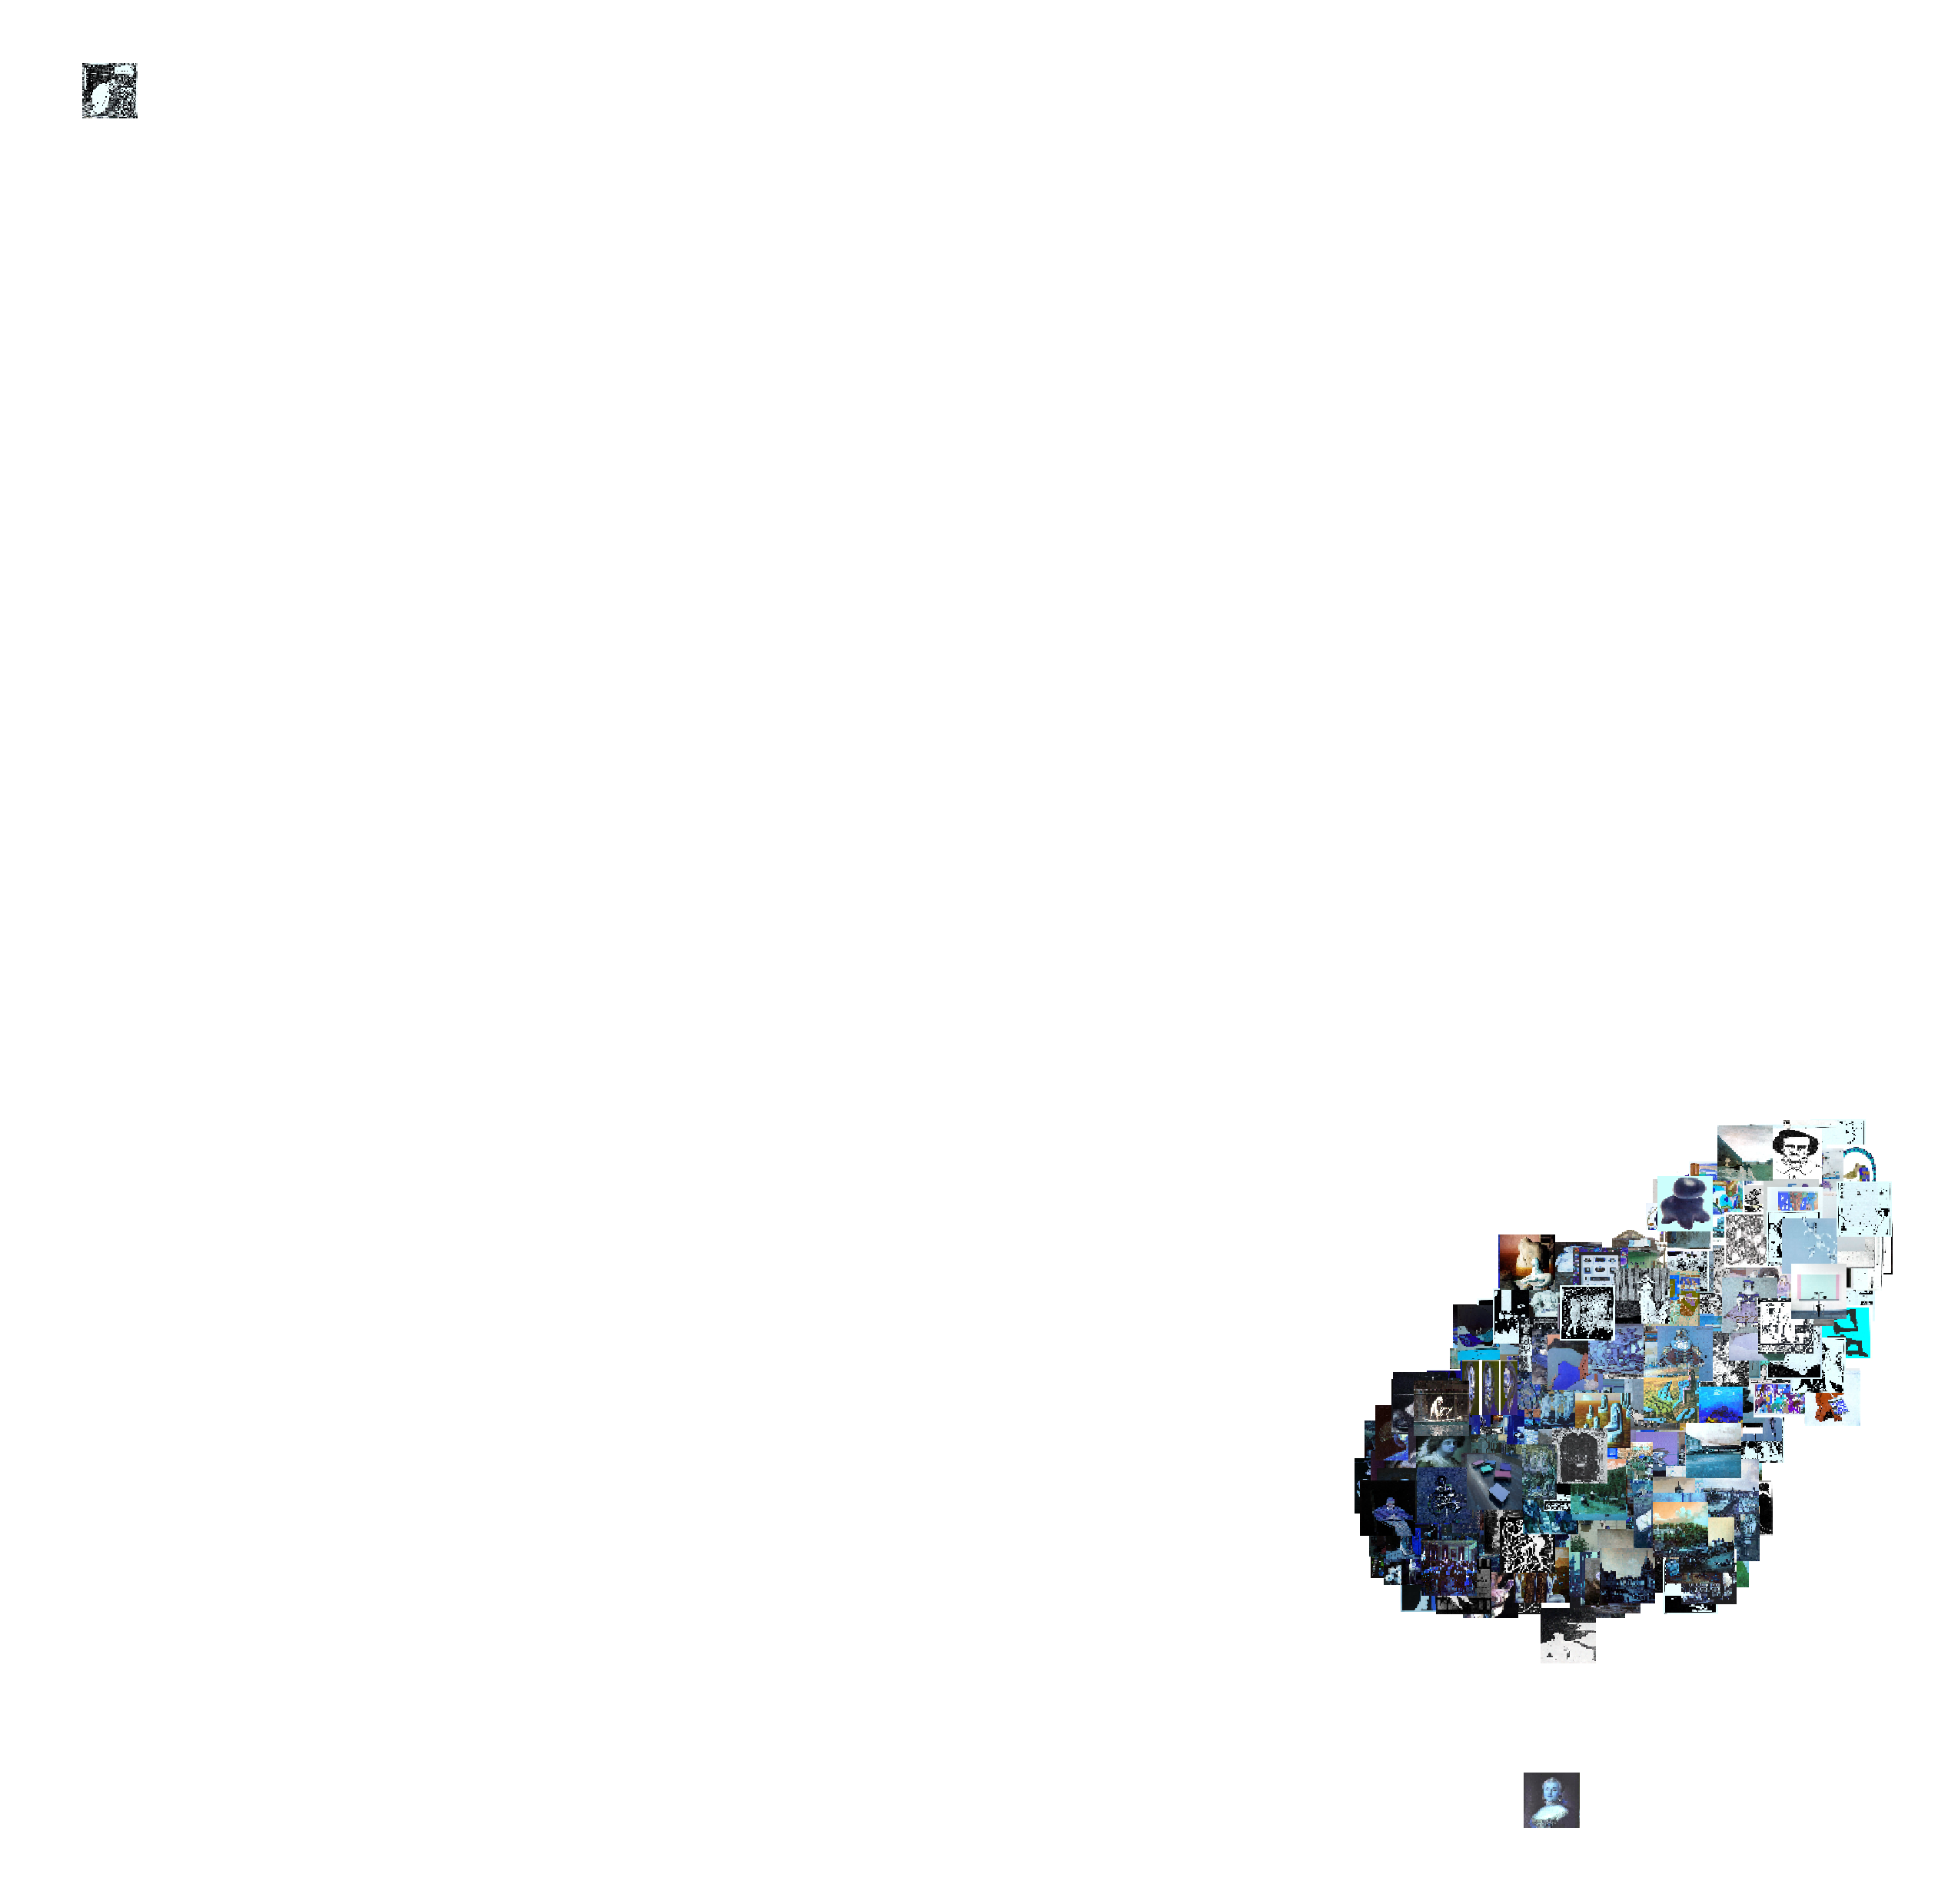

In [34]:
visualize_scatter_with_images(tsne_result_scaled, 
                                  org_images, 
                                  figsize=(45,45), 
                                  image_zoom=1.6)


In [71]:
img_vecs = []
pics = []
labels = []
hrefs = []
authors = []
titles = []
extraction_keys = ['yearAsString', 'location', 'period', 
                   'serie', 'genre', 'material', 'style', 
                   'technique', 'auction', 'galleryName', 'tags']
for filename in os.listdir('./artworks'):
    if filename.endswith('.json'):
        artist = json.load(open(os.path.join('./artworks', filename), 'r'))
        for artwork in artist:
            label = []
            if ('image' in artwork) and ('title' in artwork) and ('artistName' in artwork): # we have an image of that 
                image_vector = np.zeros(shape=(len(tags),))
                for key in extraction_keys:
                    if (key in artwork) and (artwork[key] is not None):
                        extracted_tag = artwork[key]
                        if ',' in extracted_tag:
                            extracted_tag = extracted_tag.split(',')
                            for subtag in extracted_tag:
                                image_vector[tags[subtag.strip()]] = 1 # id that shit
                                label.append(extracted_tag)
                        else:
                            image_vector[tags[extracted_tag]] = 1
                            label.append(extracted_tag)
                url = artwork['image'].replace('!Large.jpg', '')
                savename = artwork['title'] + "_" + artwork['artistName'] +'.jpg'
                savename = os.path.join('./artworks/images', savename.strip()) # that's saved image
                try:
                    img = cv2.imread(savename, cv2.IMREAD_COLOR)
                    img = cv2.resize(img, (45, 45))
                except:
                    continue
                pics.append(img)
                img_vecs.append(image_vector)
                labels.append(label)
                hrefs.append(savename)
                authors.append(artwork['artistName'])
                titles.append(artwork['title'])
img_vecs = np.array(img_vecs)

In [72]:
print(img_vecs.shape, len(pics))
assert img_vecs.shape[0] == len(pics)

(1972, 1292) 1972


In [76]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components = 20)
svd_res = svd.fit_transform(img_vecs)
svd_res = StandardScaler().fit_transform(svd_res)

In [81]:
print(svd.components_)

[[ 0.00086893  0.00927656  0.01069701 ...  0.          0.
   0.        ]
 [-0.00149126 -0.01125438 -0.01310418 ... -0.         -0.
  -0.        ]
 [-0.00057703 -0.00286929 -0.00338723 ... -0.         -0.
  -0.        ]
 ...
 [-0.01183488  0.00167443 -0.00201842 ... -0.         -0.
  -0.        ]
 [-0.00774184 -0.06434191 -0.07018398 ...  0.          0.
   0.        ]
 [ 0.02670816  0.15293628  0.16563981 ... -0.         -0.
  -0.        ]]


In [77]:
tsne = TSNE(n_components=2, perplexity=35.0)
tsne_result = tsne.fit_transform(svd_res)
tsne_result_scaled = StandardScaler().fit_transform(tsne_result)

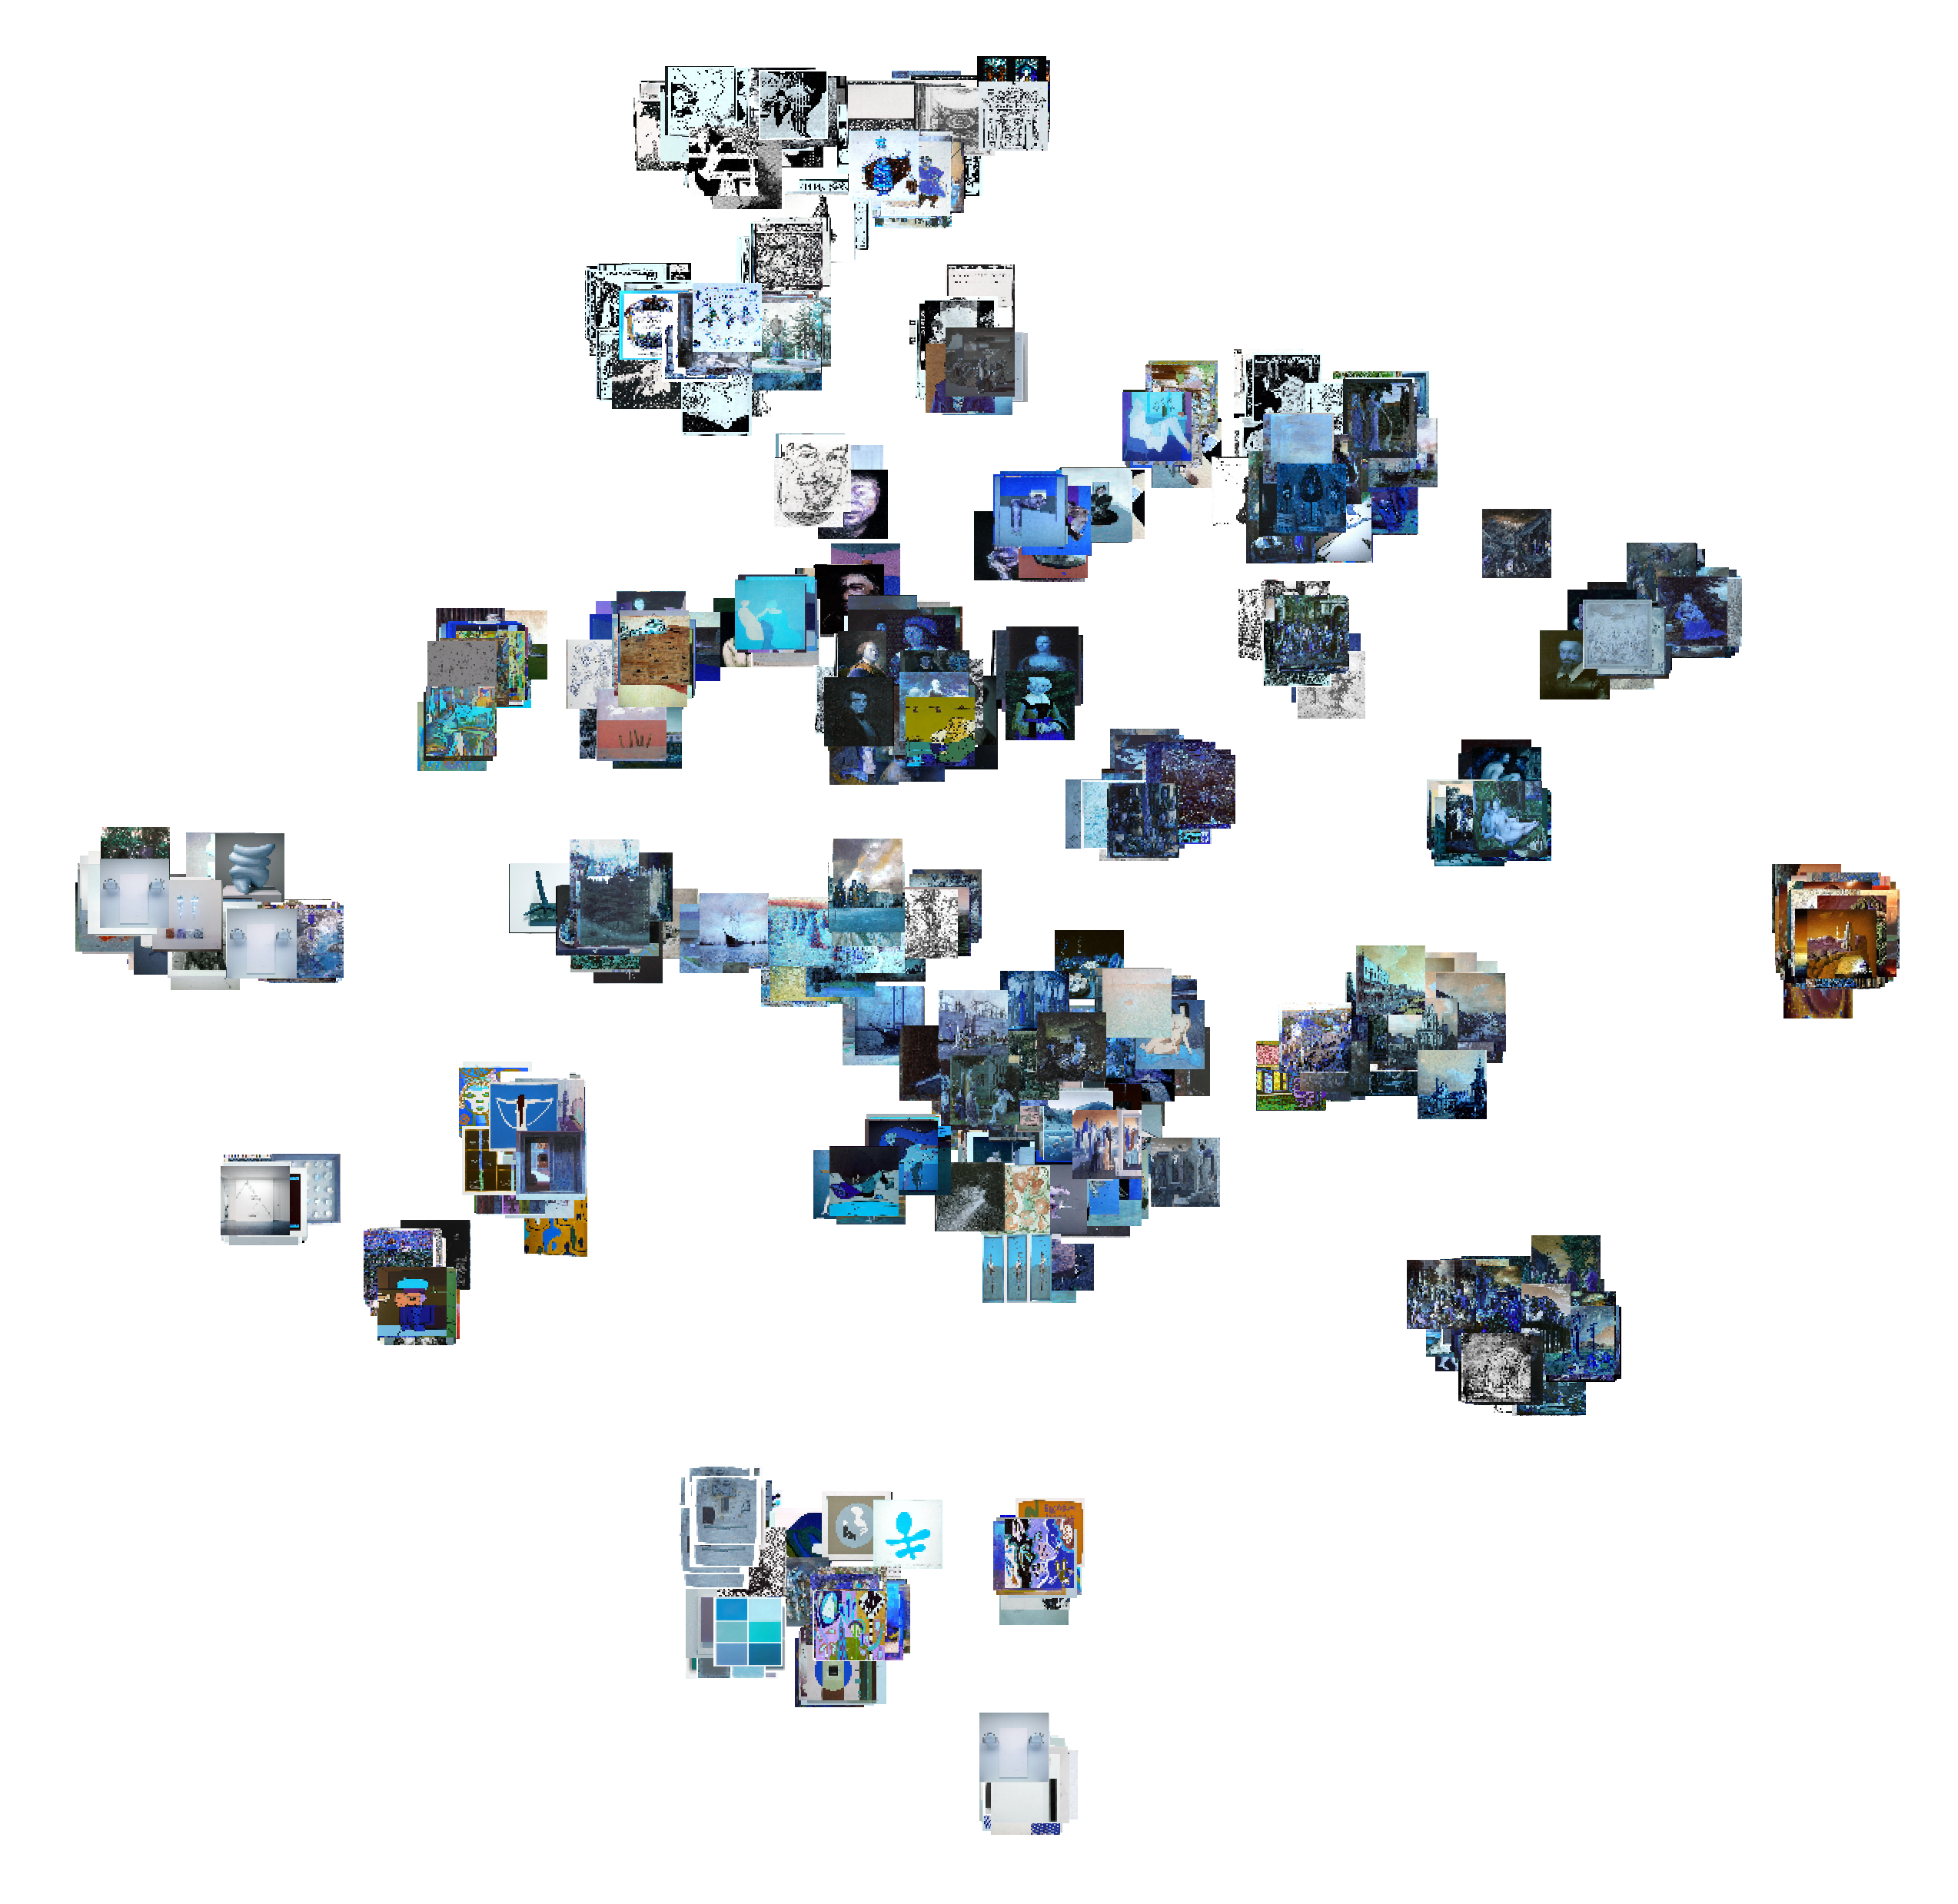

In [78]:
visualize_scatter_with_images(tsne_result_scaled, 
                                  pics, 
                                  figsize=(45,45), 
                                  image_zoom=2)

In [82]:
import pandas as pd

dct = {'x': tsne_result_scaled[:,0], 'y': tsne_result_scaled[:, 1],
       'label': labels, 'href': hrefs, 'title': titles, 'author': authors}
df = pd.DataFrame.from_dict(dct).to_csv('TSNE_ART_DICT_REVISED_SVD_CLUSTERING.csv')

In [155]:
df = pd.DataFrame.from_dict(dct)
df.sample(200).to_csv('TSNE_ART_DICT_CUT.csv')

In [143]:
df.describe()

,x,y
count,1.554000e+03,1.554000e+03
mean,8.256049e-09,1.699154e-07
std,1.000322e+00,1.000322e+00
min,-2.157189e+00,-2.137758e+00
25%,-6.364904e-01,-6.956891e-01
50%,5.641610e-02,1.442891e-01
75%,6.782324e-01,8.031914e-01
max,2.016674e+00,1.782743e+00


In [6]:
ex = json.load(open('/home/lemurpwned/repos/lemurpwned.github.io/arts/artworks/ioannis-altamouras.json', 'r'))

In [21]:
for artwork in ex:
#     for key in extraction_keys:
    if artwork['tags'] is not None
        print(artwork[key], key, type(artwork[key]))

boats-and-ships, Copenhagen tags <class 'str'>
Copenhagen tags <class 'str'>
